# Project

## Predicting Wind Turbine Power from Wind Speed

The goal of this project is to analyse a dataset of wind speeds and the wind turbine power that was produced to determine could an accurate prediction of power be predicted by knowing the wind speed. 


In [1]:
# Import libraries
# Numpy for arrays and mathematical functions
import numpy as np
# Pandas for loading the dataset to a dataframes for easy manipulation
import pandas as pd
# Matplotlib for ploting and visualising the data
import matplotlib.pyplot as plt

Pandas makes it easy to read in a csv dataset to quickly work with it. The dataset was originally available at the below link. A URL can be passed instead of a file name as below to the same function but it was saved to the same repository in case in future theres access issues.
https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv

In [2]:
dataset = pd.read_csv("powerproduction.csv")

### Initial View of the Dataset
There is 500 records in this dataset with 2 variables speed and power. Speed varies from 0 to 25 and power from 0 to 113.56.

In [25]:
dataset.describe()

speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000

The dataset is quickly graphed with Matplotlib to see what the dataset looks like. There is a clear curve to it and so a straight line may not be the best fit. When the wind speed is low the power stays low and takes some speed to start really rising. At mid speeds there does seem to be a straight line where an increase in the speed leads to a larger increase in power. Towards the higher speeds the data points look to flatten out on the x axis again as higher speeds are giving less of an increase in power as they did around the middle. 

At both the lowest and highest speed values the spread of the corresponding power value points is quite large and while in the centre they are definatly not tight together they are alot closer. There is also quite a few speed values where the power is zero and as they seem like the outliers that do not agree with the rest of the points such as at higher speeds. These outliers may need cleaned up to provide better values for regression and fitting lines that represent the relationship between power and speed closer.

Text(0.5, 1.0, 'Turbine Power')

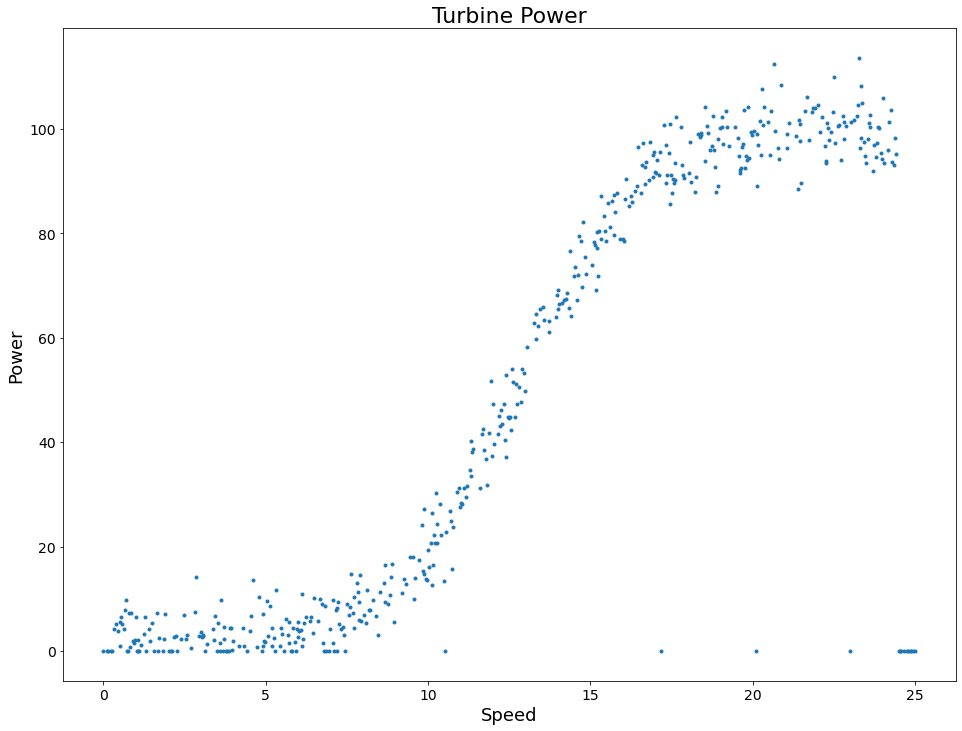

In [3]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A full stop for a dot symbol for the points
plt.plot(dataset["speed"], dataset["power"], ".")
# Add labels to the x,y axis and increase size
plt.xlabel('Speed', size=18)
plt.ylabel('Power', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Turbine Power", size=22)

### Simple Linear Regression
If the coefficients are calculated then a simple best fit straight line can be graphed with the data as below. 

In [4]:
coeffs = np.polyfit(dataset["speed"], dataset["power"], 1)
coeffs

array([  4.91759567, -13.89990263])

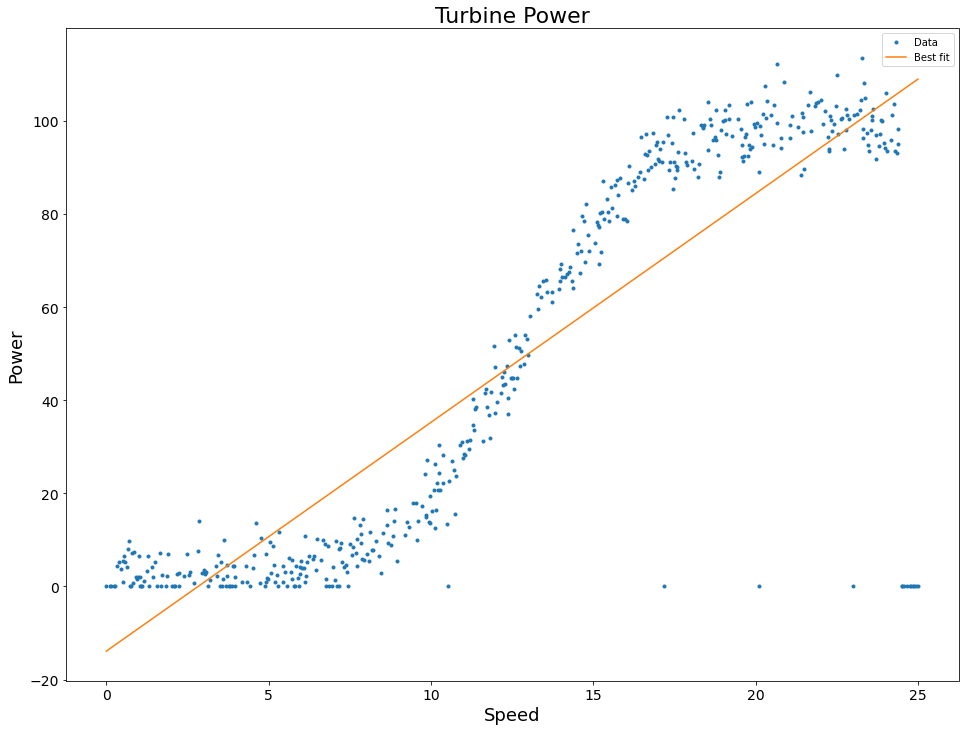

In [5]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
plt.plot(dataset["speed"], dataset["power"], '.', label="Data")
plt.plot(dataset["speed"], coeffs[0] * dataset["speed"] + coeffs[1], '-', label='Best fit')
# Add labels to the x,y axis and increase size
plt.xlabel('Speed', size=18)
plt.ylabel('Power', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Turbine Power", size=22)
plt.legend()

### Cleaning up the Data
One of the things thats noticable about the data is there is multible outliers where the power is 0. It could be assumed that these datapoints occured not due to a relationship between wind speed and turbine power but outside variables. I will remove these datapoints as they will drastically affect the substantive results of regression analysis [2]. Their large distance from the rest of the datapoints when the wind speed is above 16 will have a large effect when squared and so a line fitted to the data using regression could be dramatically altered by these.

In [14]:
dataset[dataset["power"] == 0]

speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

There is 49 of these records I will remove reducing my dataset to 451 points of data.

In [16]:
len(dataset[dataset["power"] == 0])

49

Viewing the data when plotted it can be seen a large group of points appearing with zero power occurs at the highest speed. It could be assummed that maybe there is a cutoff as to the turbine may be switched off at high speeds to protect it from damage [3]. This is an assumption though as no data on this turbine was provided and all there is to go on is the dataset provided. When all values of power for a speed above 24 is viewed, it can be seen that at a wind speed greater than 24.449, all values provided of power are 0. This does agree with that assumption and it may be the reason why these datapoints occur distant from the rest. If the reason is the turbine is shut off for its safety at wind speeds at and above 24.4999 then finding out the relationship between wind speed and power output at higher speeds may not be needed by the turbine company if its not normal operating conditions. Again though this is an assumption as no data on operating conditions for the turbine was provided.

In [26]:
dataset[dataset["speed"] > 24]

speed    power
481  24.024  105.992
482  24.049   93.524
483  24.174   95.869
484  24.199  101.419
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117
490  24.499    0.000
491  24.525    0.000
492  24.575    0.000
493  24.650    0.000
494  24.750    0.000
495  24.775    0.000
496  24.850    0.000
497  24.875    0.000
498  24.950    0.000
499  25.000    0.000

The reason for all values of wind speed at and below 0.275 having a power value of 0 could be that at very low speeds the turbine will not produce any power with a brake applied so it does not turn [4]. This again is an assumption when im assuming these low values are outside the operating speeds where power is expected to be generated and so the relationship between wind speed and turbine power is not as valued.

In [30]:
dataset[dataset["speed"] < 0.5]

speed  power
0  0.000  0.000
1  0.125  0.000
2  0.150  0.000
3  0.225  0.000
4  0.275  0.000
5  0.325  4.331
6  0.400  5.186
7  0.450  3.826

A dataframe without power values of 0 will be used instead for trying to find the relationship between wind speed and turbine power [5].

In [28]:
# Find the index of all rows where power is 0
index_power_zero = dataset[dataset["power"] == 0].index
# Drop rows with those index values
dataset_without_zero_power = dataset.drop(index_power_zero)

In [27]:
# Reduced dataset
dataset_without_zero_power

speed    power
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[451 rows x 2 columns]

Text(0.5, 1.0, 'Turbine Power greater than 0')

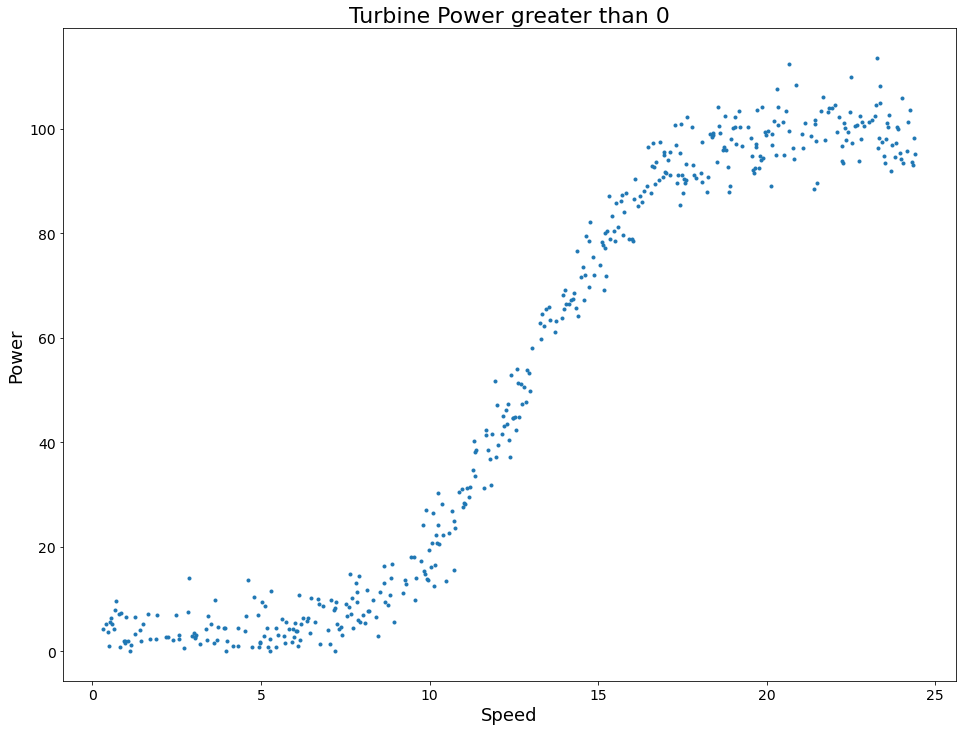

In [29]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A full stop for a dot symbol for the points
plt.plot(dataset_without_zero_power["speed"], dataset_without_zero_power["power"], ".")
# Add labels to the x,y axis and increase size
plt.xlabel('Speed', size=18)
plt.ylabel('Power', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Turbine Power greater than 0", size=22)

### References
[1] Matplotlib tutorial for making changes to plots  
https://matplotlib.org/3.3.3/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

[2] The Effect of Outliers on Regression Analysis: Regime Type and Foreign Direct Investment
https://pdfs.semanticscholar.org/5c00/f162180c61f8deb4e6836e50a28daf20d269.pdf

[3] Switching off wind turbines when wind speed is high for safety  
https://www.energy.gov/eere/articles/how-do-wind-turbines-survive-severe-storms#:~:text=When%20the%20anemometer%20registers%20wind,turbine%20to%20automatically%20shut%20off.

[4] FAQ on wind turbine with minimum speeds for power generation  
https://www.kvcc.edu/about/sustainability/images/Wind_FAQ.pdf

[5] Dropping rows in dataframe based on condition  
https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
